In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
# Data preprocessing (example for image folder structure)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    '/kaggle/input/gender-classification-dataset/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed = 42
)

val_data = train_datagen.flow_from_directory(
    '/kaggle/input/gender-classification-dataset/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed = 42
)

test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(
    '/kaggle/input/gender-classification-dataset/Validation',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 37608 images belonging to 2 classes.
Found 9401 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [12]:
# Build the CNN model with regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3),
    kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


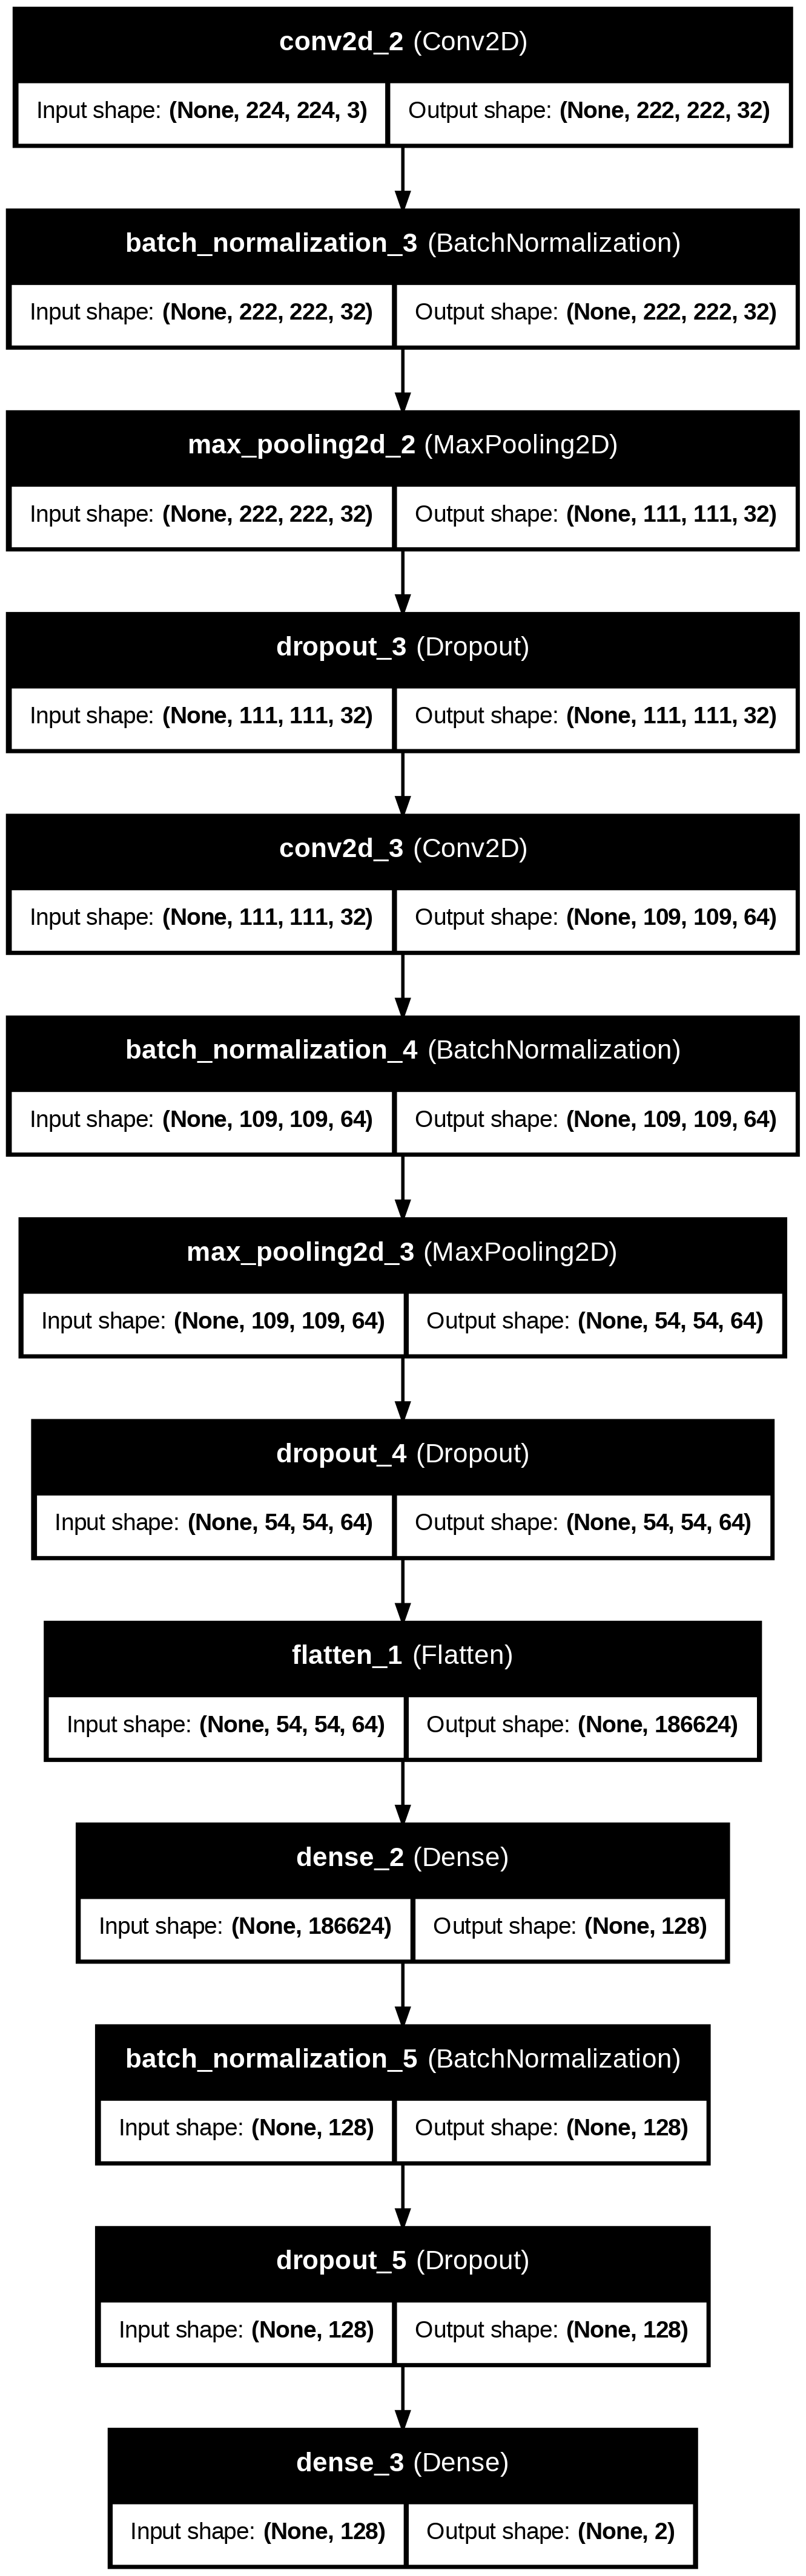

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [31]:
# Record training time
start_train = time.time()
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=[early_stop],
    verbose=1
)
end_train = time.time()

Epoch 1/20
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 75s 64ms/step - accuracy: 0.9303 - loss: 0.4672 - val_accuracy: 0.9306 - val_loss: 0.4164
Epoch 2/20
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 79s 67ms/step - accuracy: 0.9334 - loss: 0.4151 - val_accuracy: 0.9134 - val_loss: 0.4441
Epoch 3/20
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 76s 65ms/step - accuracy: 0.9328 - loss: 0.4050 - val_accuracy: 0.9105 - val_loss: 0.4476
Epoch 4/20
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.9288 - loss: 0.4082 - val_accuracy: 0.9223 - val_loss: 0.4041
Epoch 5/20
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 73s 62ms/step - accuracy: 0.9326 - loss: 0.3981 - val_accuracy: 0.9281 - val_loss: 0.4083
Epoch 6/20
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 79s 67ms/step - accuracy: 0.9367 - loss: 0.3807 - val_accuracy: 0.9297 - val_loss: 0.4003
Epoch 7/20
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 74s 63ms/step - accuracy: 0.9339 - loss: 0.3976 - val_accuracy: 0.9368 - val_loss: 0.3641
Epoch 8/20
1176/1176 ━━━━━━━━━━━━━━━━━━━━ 72s 61ms/step - accuracy: 0.9341 -

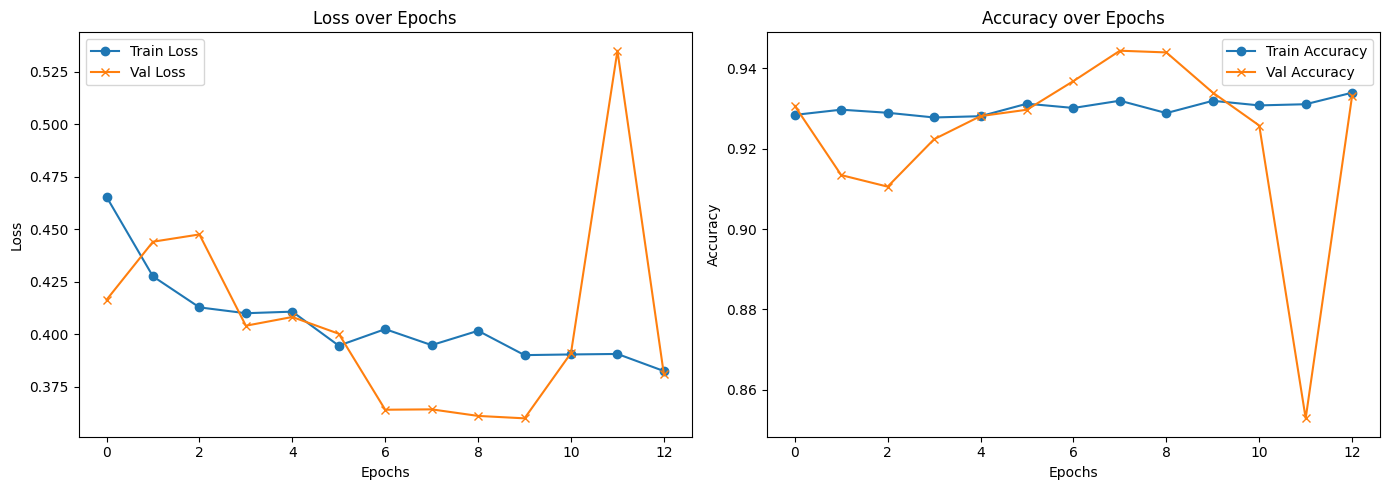

In [32]:
# Plot loss & accuracy curves
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
# Evaluate on test data
start_test = time.time()
y_pred_probs = model.predict(test_data, verbose=1)
end_test = time.time()
y_pred_classes = np.argmax(y_pred_probs, axis=1)

365/365 ━━━━━━━━━━━━━━━━━━━━ 30s 83ms/step


In [34]:
y_true = test_data.classes                 # integer labels
label_names = list(test_data.class_indices.keys()) 

In [35]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_names))



Classification Report:
              precision    recall  f1-score   support

      female       0.96      0.92      0.94      5841
        male       0.92      0.96      0.94      5808

    accuracy                           0.94     11649
   macro avg       0.94      0.94      0.94     11649
weighted avg       0.94      0.94      0.94     11649



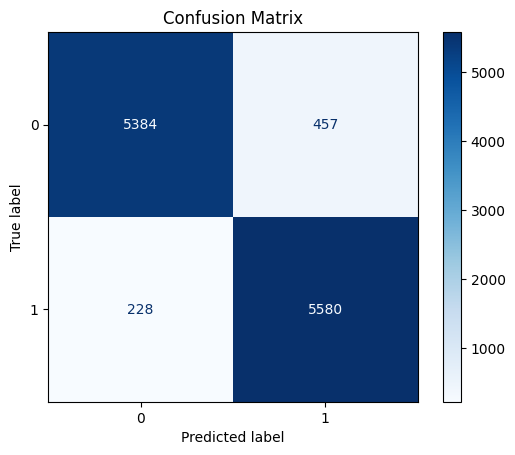

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(2))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [37]:
from tensorflow.keras.utils import load_img, img_to_array


Total Misclassified Samples: 685


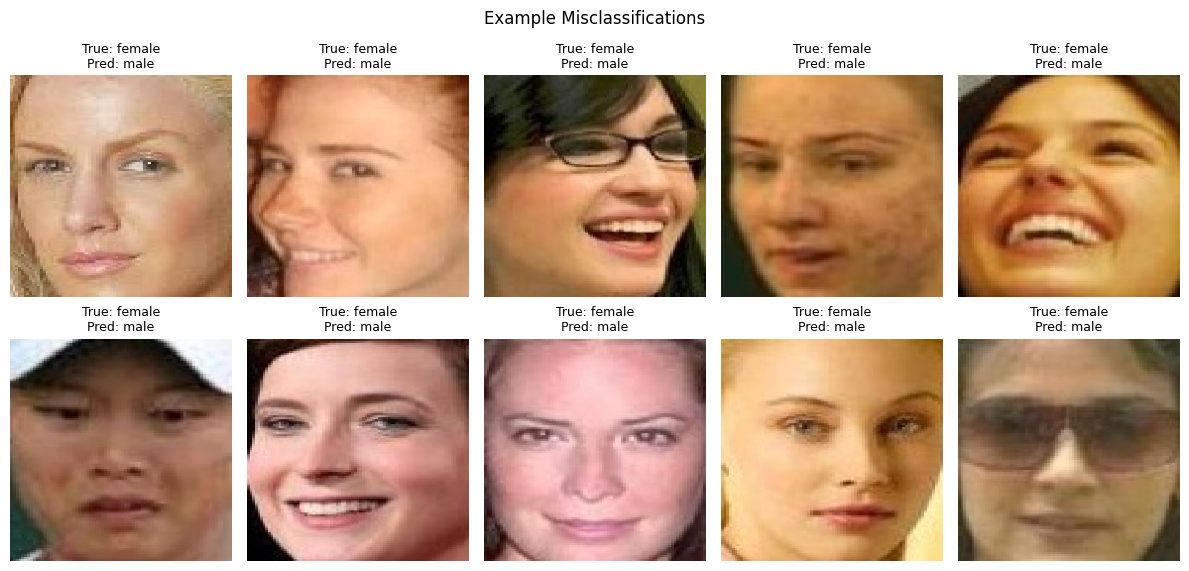

In [38]:
# ---------- Ground‑truth & file‑paths ----------
y_true      = test_data.classes          # int labels
file_paths  = test_data.filepaths        # absolute image paths
label_names = list(test_data.class_indices.keys())  # ['female', 'male']

# Mis‑classified indices
mis_idx = np.where(y_pred_classes != y_true)[0]
print(f"\nTotal Misclassified Samples: {len(mis_idx)}")

# Plot first 10 mistakes
plt.figure(figsize=(12, 6))
for i, idx in enumerate(mis_idx[:10]):
    # image load & rescale just for display
    img = load_img(file_paths[idx], target_size=(224, 224))   # PIL Image
    img_arr = img_to_array(img) / 255.0

    plt.subplot(2, 5, i + 1)
    plt.imshow(img_arr)
    true_lbl = label_names[y_true[idx]]
    pred_lbl = label_names[y_pred_classes[idx]]
    plt.title(f"True: {true_lbl}\nPred: {pred_lbl}", fontsize=9)
    plt.axis('off')

plt.suptitle("Example Misclassifications")
plt.tight_layout()
plt.show()

In [39]:
# Print training and testing time
print(f"\nTraining Time: {end_train - start_train:.2f} seconds")
print(f"Inference Time on Test Set: {end_test - start_test:.2f} seconds")


Training Time: 990.13 seconds
Inference Time on Test Set: 30.80 seconds


In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Path to your new image (replace this with your actual path)
img_path = '/kaggle/input/for-prediction-in-cnn/Screenshot 2025-04-25 115016.png'  # ya '/kaggle/working/image.jpg'

# Step 2: Load & preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # resize same as model input
img_array = image.img_to_array(img)                     # convert to array
img_array = img_array / 255.0                           # normalize (rescale)
img_array = np.expand_dims(img_array, axis=0)           # add batch dimension: shape = (1, 224, 224, 3)

# Step 3: Predict
pred_prob = model.predict(img_array)                    # returns [[0.8, 0.2]] for example
pred_class = np.argmax(pred_prob, axis=1)[0]            # returns class index (0 or 1)

# Step 4: Map to class name
label_map = test_data.class_indices                     # e.g. {'female': 0, 'male': 1}
inv_label_map = {v: k for k, v in label_map.items()}    # reverse mapping
pred_label = inv_label_map[pred_class]

# Step 5: Print result
print(f"Predicted Gender: {pred_label} (Confidence: {np.max(pred_prob):.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Gender: male (Confidence: 0.81)


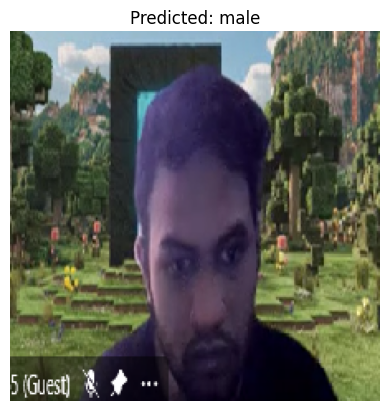

In [43]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted: {pred_label}")
plt.axis('off')
plt.show()


In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Path to your new image (replace this with your actual path)
img_path = '/kaggle/input/for-prediction-in-cnn/las-vegas-nevada-jungkook-of-bts-attends-the-64th-annual-grammy-awards-at-mgm-grand-garden.webp'  # ya '/kaggle/working/image.jpg'

# Step 2: Load & preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # resize same as model input
img_array = image.img_to_array(img)                     # convert to array
img_array = img_array / 255.0                           # normalize (rescale)
img_array = np.expand_dims(img_array, axis=0)           # add batch dimension: shape = (1, 224, 224, 3)

# Step 3: Predict
pred_prob = model.predict(img_array)                    # returns [[0.8, 0.2]] for example
pred_class = np.argmax(pred_prob, axis=1)[0]            # returns class index (0 or 1)

# Step 4: Map to class name
label_map = test_data.class_indices                     # e.g. {'female': 0, 'male': 1}
inv_label_map = {v: k for k, v in label_map.items()}    # reverse mapping
pred_label = inv_label_map[pred_class]

# Step 5: Print result
print(f"Predicted Gender: {pred_label} (Confidence: {np.max(pred_prob):.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Gender: male (Confidence: 0.96)


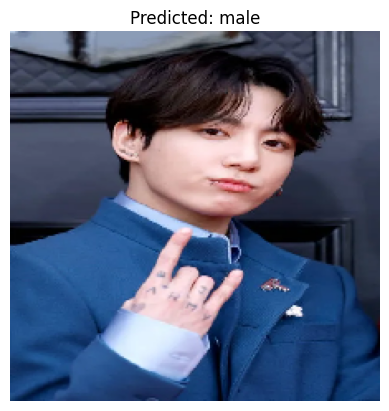

In [45]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted: {pred_label}")
plt.axis('off')
plt.show()

In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Path to your new image (replace this with your actual path)
img_path = '/kaggle/input/for-prediction-in-cnn/Virat_Kohli_during_the_India_vs_Aus_4th_Test_match_at_Narendra_Modi_Stadium_on_09_March_2023.webp'  # ya '/kaggle/working/image.jpg'

# Step 2: Load & preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # resize same as model input
img_array = image.img_to_array(img)                     # convert to array
img_array = img_array / 255.0                           # normalize (rescale)
img_array = np.expand_dims(img_array, axis=0)           # add batch dimension: shape = (1, 224, 224, 3)

# Step 3: Predict
pred_prob = model.predict(img_array)                    # returns [[0.8, 0.2]] for example
pred_class = np.argmax(pred_prob, axis=1)[0]            # returns class index (0 or 1)

# Step 4: Map to class name
label_map = test_data.class_indices                     # e.g. {'female': 0, 'male': 1}
inv_label_map = {v: k for k, v in label_map.items()}    # reverse mapping
pred_label = inv_label_map[pred_class]

# Step 5: Print result
print(f"Predicted Gender: {pred_label} (Confidence: {np.max(pred_prob):.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Gender: male (Confidence: 0.94)


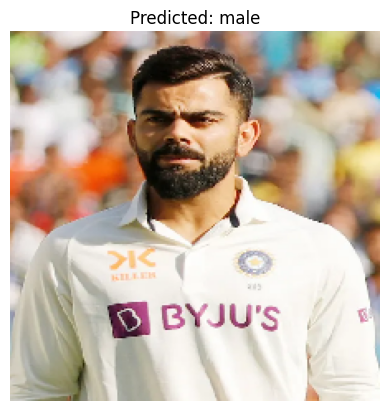

In [47]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted: {pred_label}")
plt.axis('off')
plt.show()

In [48]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Path to your new image (replace this with your actual path)
img_path = '/kaggle/input/for-prediction-in-cnn/image.webp'  # ya '/kaggle/working/image.jpg'

# Step 2: Load & preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # resize same as model input
img_array = image.img_to_array(img)                     # convert to array
img_array = img_array / 255.0                           # normalize (rescale)
img_array = np.expand_dims(img_array, axis=0)           # add batch dimension: shape = (1, 224, 224, 3)

# Step 3: Predict
pred_prob = model.predict(img_array)                    # returns [[0.8, 0.2]] for example
pred_class = np.argmax(pred_prob, axis=1)[0]            # returns class index (0 or 1)

# Step 4: Map to class name
label_map = test_data.class_indices                     # e.g. {'female': 0, 'male': 1}
inv_label_map = {v: k for k, v in label_map.items()}    # reverse mapping
pred_label = inv_label_map[pred_class]

# Step 5: Print result
print(f"Predicted Gender: {pred_label} (Confidence: {np.max(pred_prob):.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Gender: male (Confidence: 0.77)


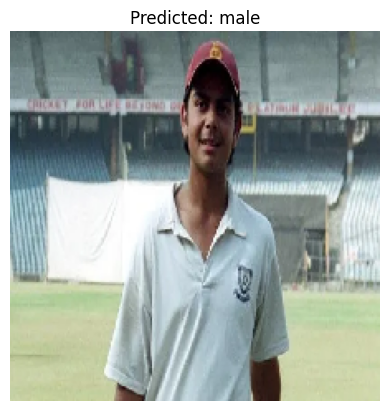

In [49]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted: {pred_label}")
plt.axis('off')
plt.show()